In [10]:
import scipy.io as spio
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
matX = spio.loadmat("../extracting_input_and_output/out/Dog1X.mat")
matY = spio.loadmat("../extracting_input_and_output/out/Dog1Y.mat")
X = matX['X']
y = matY['Y']

In [3]:
trainX, testX, trainY, testY = train_test_split(X,y,test_size=0.30, random_state=42)

In [4]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('SVM', SVC()))

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, trainX, trainY.ravel(), cv=kfold, scoring='accuracy')
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.950582 (0.010511)
SVM: 0.952144 (0.010006)


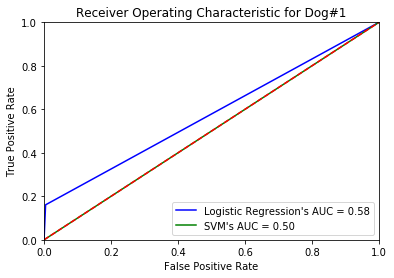

In [13]:
logisticModel = LogisticRegression()
logisticModel.fit(trainX, trainY.ravel())
logisticPred = logisticModel.predict(testX)
logisticScore = accuracy_score(testY, logisticPred)

logistic_false_positive_rate, logistic_true_positive_rate, thresholds = roc_curve(testY, logisticPred)
logistic_roc_auc = auc(logistic_false_positive_rate, logistic_true_positive_rate)

SVMModel = SVC()
SVMModel.fit(trainX, trainY.ravel())
SVMPred = SVMModel.predict(testX)
SVMscore = accuracy_score(testY, SVMPred)

svm_false_positive_rate, svm_true_positive_rate, thresholds = roc_curve(testY, SVMPred)
svm_roc_auc = auc(svm_false_positive_rate, svm_true_positive_rate)

plt.title('Receiver Operating Characteristic for Dog#1')
plt.plot(logistic_false_positive_rate, logistic_true_positive_rate, 'b',
label='Logistic Regression\'s AUC = %0.2f'% logistic_roc_auc)
plt.plot(svm_false_positive_rate, svm_true_positive_rate, 'g',
label='SVM\'s AUC = %0.2f'% svm_roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0,1.0])
plt.ylim([-0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()